# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


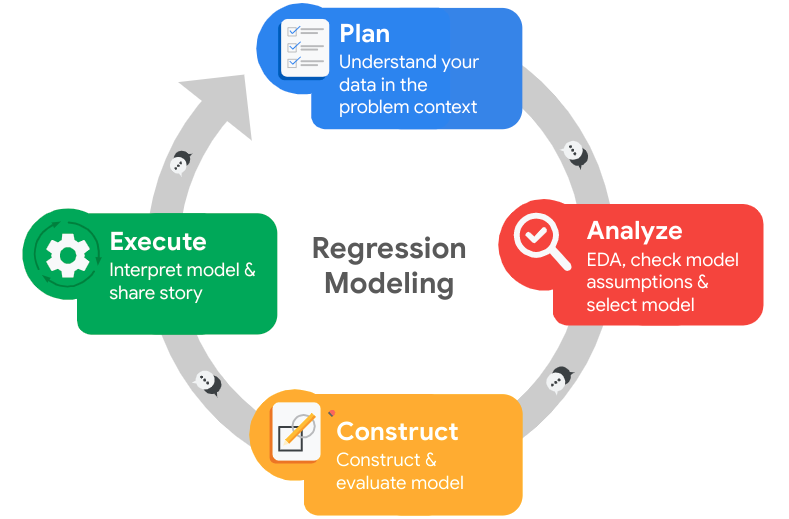

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* The stakeholders for this project are the leadership team and the HR team.
* Business Problem: There is a high turnover rate among Salifort Motors employees. Turnover is costly, and Salifort strives to create a corporate culture that supports employee success and professional development. Salifort wants to better understand the problem in order to develop a solution.
* The goal is to build a model to predict whether an employee will leave the company based on HR survey data and develop insights on how to improve employee retention.
* There are two categorical fields, `Department` and `salary` that will need to be dummy encoded.
* There are no missing values, but a large number of duplicate values.
* I am relying on code from earlier courses in this certificate, as well as Googling syntax for manipulating dataframes as well as tweaking plots.
    * https://sparkbyexamples.com/pandas/pandas-get-column-names/
    * https://www.w3schools.com/python/pandas/ref_df_duplicated.asp
    * https://saturncloud.io/blog/5-easy-ways-to-get-pandas-dataframe-row-count/
* I have no ethical considerations at this stage. An employer looking to predict employee turnover is a typical HR activity, and the data is anonomized. However, it is important for the HR team to use these results in an ethical way.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [78]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For assumption checking (Box Tidwell test)
import statsmodels.api as sma
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

# Additional assumption testing (VIF to test for multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Packages for OLS, MLR, confusion matrix
import sklearn.metrics as metrics # For confusion matrix
import statsmodels.tools as tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay


# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)


SyntaxError: invalid syntax (<ipython-input-78-c5852251a23f>, line 31)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns.values


array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [6]:
# Rename columns as needed
df0.columns = ['satisfaction', 'evaluation', 'projects',
               'avg_monthly_hours', 'tenure', 'work_accident',
               'exited', 'promotion', 'department', 'salary']


# Display all column names after the update
df0.columns.values


array(['satisfaction', 'evaluation', 'projects', 'avg_monthly_hours',
       'tenure', 'work_accident', 'exited', 'promotion', 'department',
       'salary'], dtype=object)

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction         0
evaluation           0
projects             0
avg_monthly_hours    0
tenure               0
work_accident        0
exited               0
promotion            0
department           0
salary               0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
mask = df0.duplicated()
df0[mask].head(10)


,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Checking to make sure the appropriate number of rows was removed
print('df0 row count: ', len(df0))
print('df1 row count: ', len(df1))
print('duplicate rows removed: ', (len(df0) - len(df1)))
print('duplicate row count:', df0.duplicated().sum())

df0 row count:  14999
df1 row count:  11991
duplicate rows removed:  3008
duplicate row count: 3008


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   satisfaction       11991 non-null  float64
 1   evaluation         11991 non-null  float64
 2   projects           11991 non-null  int64  
 3   avg_monthly_hours  11991 non-null  int64  
 4   tenure             11991 non-null  int64  
 5   work_accident      11991 non-null  int64  
 6   exited             11991 non-null  int64  
 7   promotion          11991 non-null  int64  
 8   department         11991 non-null  object 
 9   salary             11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

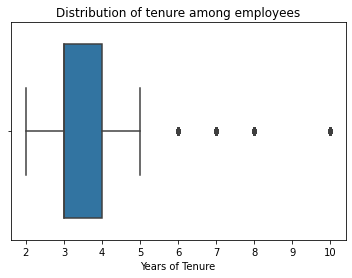

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

# Create boxplot
box = sns.boxplot(x=df1['tenure'])
g = plt.gca()
plt.xlabel('Years of Tenure')
plt.title('Distribution of tenure among employees');


In [14]:
# Determine the number of rows containing outliers

# Calculate 25th percentile of tenure
percentile25 = df1['tenure'].quantile(0.25)

# Calculate 75th percentile of tenure
percentile75 = df1['tenure'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Isolate outliers
mask = ((df1['tenure'] < lower_limit) | (upper_limit < df1['tenure']))
print("Number of outliers on tenure: ",len(df1[mask]))


Number of outliers on tenure:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




* Relationships between variables:
    * There is collinearity between avg_monthly_hours and projects. `avg_monthly_hours` is more highly correlated with `exited`, so for a logistic regression, `projects` would be dropped.
    * Collinearity between `avg_monthly_hours` and `evaluation` is also a concern. Of these two, I would drop `evaluation` for a logistic regression, because it has the lower correlation with `exited`.
* Distributions in the data:
    * `tenure` is skewed right, with some extreme outliers on the high end of the range.
    * Few employees have been involved in a `work_accident`.
    * Very few employees have been promoted within the last 5 years.
    * Most employees are in the low and medium range for `salary`, with few employees in the high range.
    * Sales is the largest `department`, followed by technical and support.
* Completing EDA before constructing a predictive model lets you explore and examine the data in order to make decisions about it. It helps you identify and decide how to handle missing and duplicate data. During EDA, you examine data types to determine whether variables need to be transformed, such as dummy encoding categorical variables. Examining variables during EDA will also help you determine what model or models are most appropriate, as well as whether the assumptions of your model have been met.
* I find myself referring to previous code covered in this course, plus some additional online resources
    * Visualization Resources:
        * https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram
        * https://www.geeksforgeeks.org/handling-categorical-data-in-python/
        * https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
        * https://stackoverflow.com/questions/47074423/how-to-get-default-blue-colour-of-matplotlib-pyplot-scatter
        * https://python-charts.com/distribution/histogram-group-seaborn/
        * https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
        * https://www.statology.org/seaborn-countplot-order/
    * Instructions on calculating Variance Inflation Factor (VIF):
        * https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
    * Interpreting VIF:
        * https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print('Class Balance:')
print()
print(df1['exited'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['exited'].value_counts(normalize=True))


Class Balance:

0    10000
1     1991
Name: exited, dtype: int64

0    0.833959
1    0.166041
Name: exited, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Years of Tenure by Turnover Group')

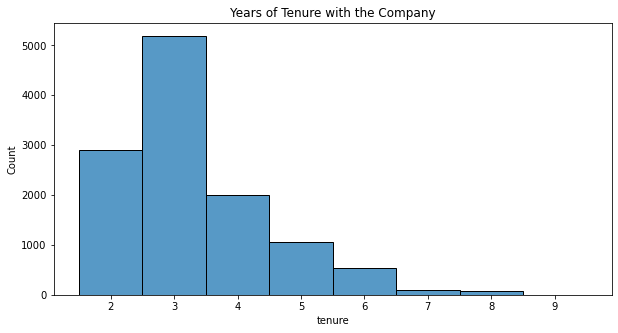

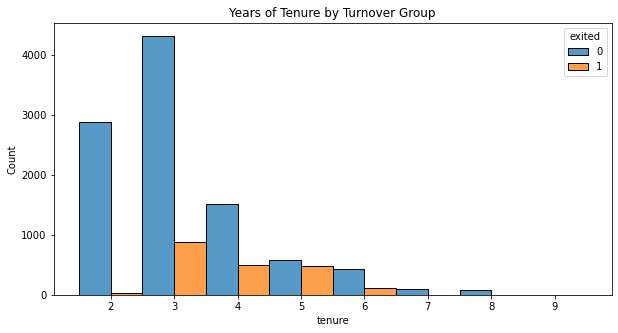

In [16]:
# Creating a histogram of years of tenure
plt.figure(figsize=(10,5))
sns.histplot(df1['tenure'], bins=np.arange(min(df1['tenure'])-0.5, max(df1['tenure'])+0.5))
plt.title('Years of Tenure with the Company');

# Creating a histogram of years of tenure grouped by turnover group (exited vs. did not exit)
plt.figure(figsize=(10,5))
sns.histplot(x=df1['tenure'], hue=df1['exited'], bins=np.arange(min(df1['tenure'])-0.5, max(df1['tenure'])+0.5), 
             multiple='dodge')
plt.title('Years of Tenure by Turnover Group')

In [17]:
# Because we are building a logistic regression and one of the assumptions is no extreme outliers,
# we are going to impute the outliers.

# Impute the maximum value as `Q3 + (1.5 * IQR)`.

def outlier_imputer(df, column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        df: the dataframe
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

outlier_imputer(df1, ['tenure'], 1.5)

tenure
q3: 4.0
upper_threshold: 5.5
count    11991.000000
mean         3.273455
std          1.057809
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.500000
Name: tenure, dtype: float64



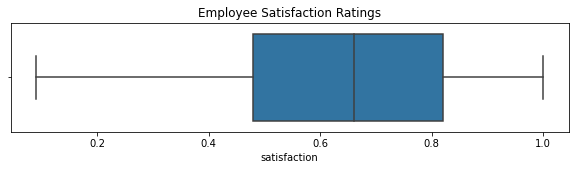

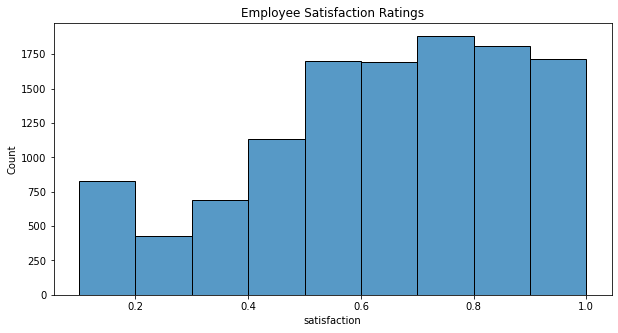

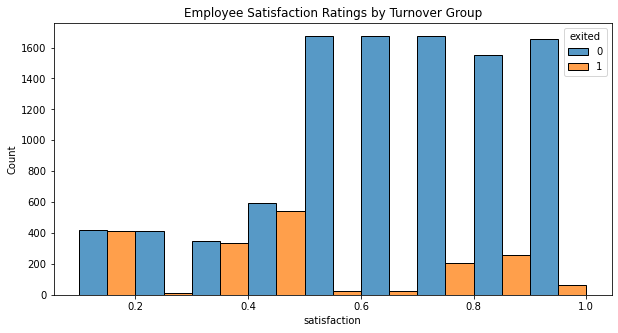

In [18]:
# Boxplot of Employee Satisfaction Ratings
plt.figure(figsize=(10,2))
plt.title('Employee Satisfaction Ratings')
sns.boxplot(data=None, x=df1['satisfaction'], fliersize=1);

# Histogram of Employee Satisfaction Ratings
plt.figure(figsize=(10,5))
sns.histplot(df1['satisfaction'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title('Employee Satisfaction Ratings');

# Histogram of Employee Satisfaction Ratings by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['satisfaction'],hue=df1['exited'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], multiple='dodge')
plt.title('Employee Satisfaction Ratings by Turnover Group');


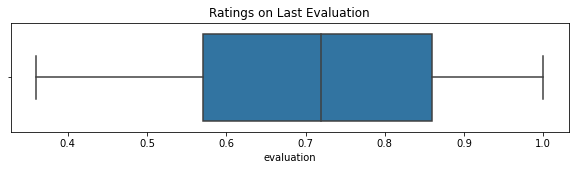

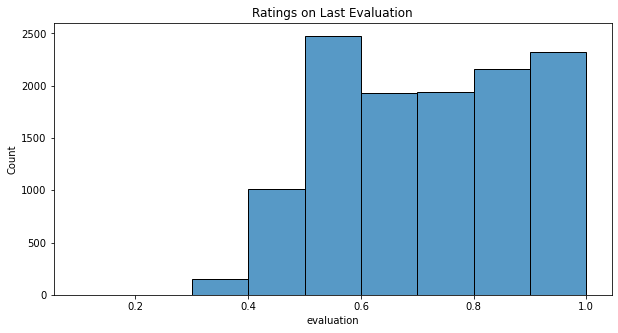

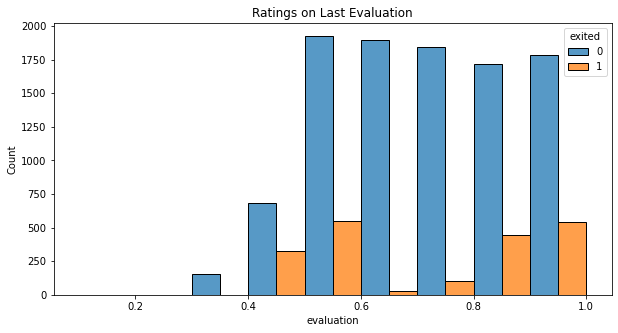

In [19]:
# Boxplot of Evaluation Ratings
plt.figure(figsize=(10,2))
plt.title('Ratings on Last Evaluation')
sns.boxplot(data=None, x=df1['evaluation'], fliersize=1);

# Histogram of Employee Satisfaction Ratings
plt.figure(figsize=(10,5))
sns.histplot(df1['evaluation'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title('Ratings on Last Evaluation');

# Histogram of Employee Satisfaction Ratings by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['evaluation'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], hue=df1['exited'],multiple='dodge')
plt.title('Ratings on Last Evaluation');

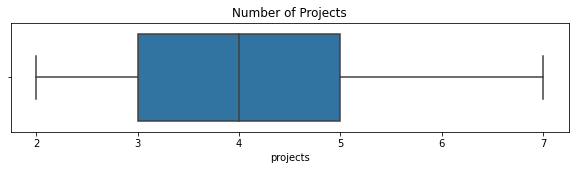

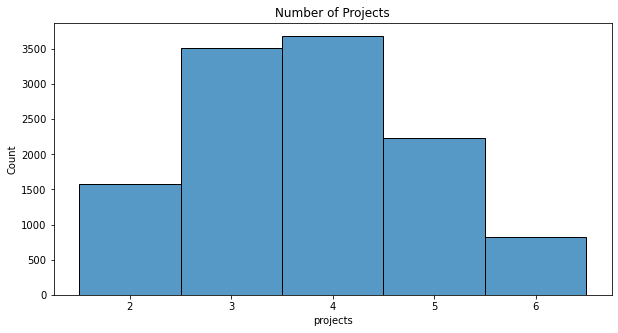

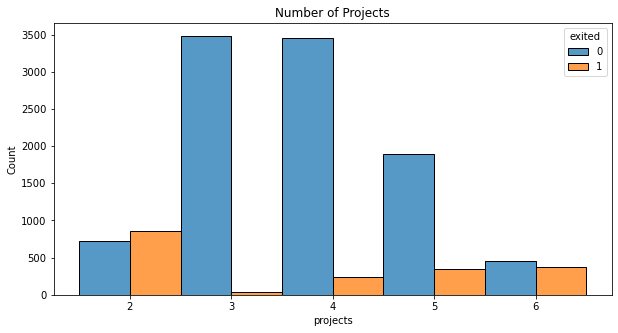

In [20]:
# Boxplot of Number of Projects
plt.figure(figsize=(10,2))
plt.title('Number of Projects')
sns.boxplot(data=None, x=df1['projects'], fliersize=1);

# Histogram of Number of Projects
plt.figure(figsize=(10,5))
sns.histplot(df1['projects'], bins=np.arange(min(df1['projects'])-0.5, max(df1['projects'])+0.5))
plt.title('Number of Projects');

# Histogram of Number of Projects by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['projects'], bins=np.arange(min(df1['projects'])-0.5, max(df1['projects'])+0.5), hue=df1['exited'],
            multiple='dodge')
plt.title('Number of Projects');

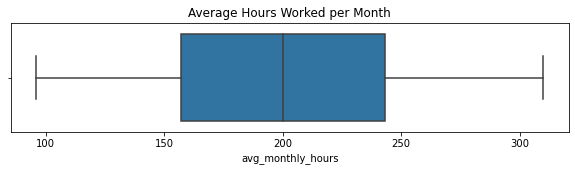

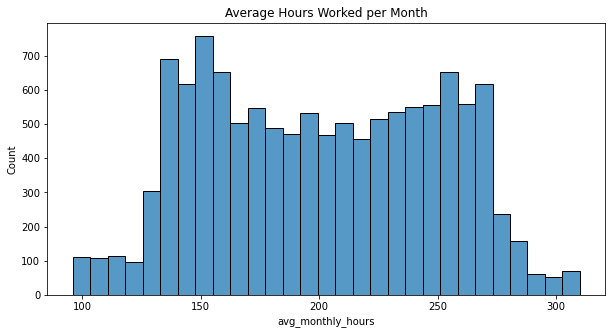

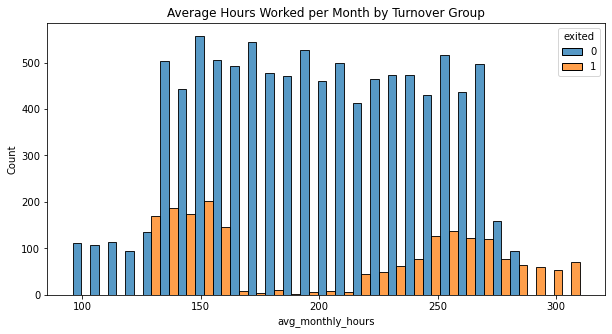

In [21]:
# Barplot of Average Hours Worked per Month
plt.figure(figsize=(10,2))
plt.title('Average Hours Worked per Month')
sns.boxplot(data=None, x=df1['avg_monthly_hours'], fliersize=1);

# Histogram of Average Hours Worked per Month
plt.figure(figsize=(10,5))
sns.histplot(df1['avg_monthly_hours'])
plt.title('Average Hours Worked per Month');

# Histogram of Average Hours Worked per Month by turnover group
plt.figure(figsize=(10,5))
sns.histplot(x=df1['avg_monthly_hours'], hue=df1['exited'], multiple='dodge')
plt.title('Average Hours Worked per Month by Turnover Group');

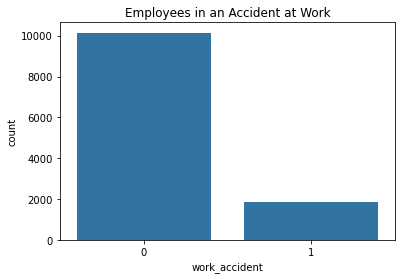

In [22]:
# Create a plot for work_accident
sns.countplot(x='work_accident', data=df1, color= '#1f77b4')
plt.title('Employees in an Accident at Work');

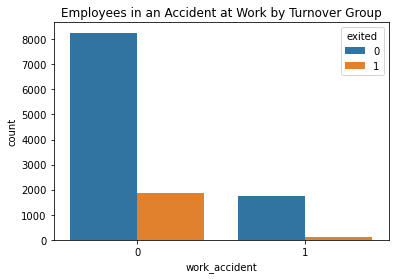

In [23]:
# Create a plot for work_accident
sns.countplot(x='work_accident', hue='exited', data=df1)
plt.title('Employees in an Accident at Work by Turnover Group');

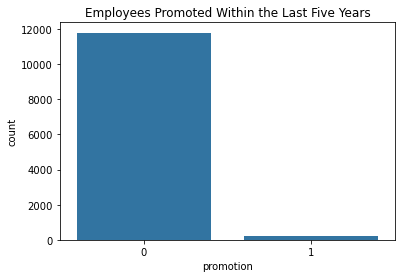

In [24]:
# Create a plot for promotion
sns.countplot(df1['promotion'], color = '#1f77b4')
plt.title('Employees Promoted Within the Last Five Years');

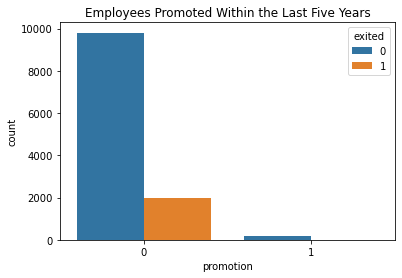

In [25]:
# Create a plot for promotion
sns.countplot(x='promotion', hue='exited', data=df1)
plt.title('Employees Promoted Within the Last Five Years');

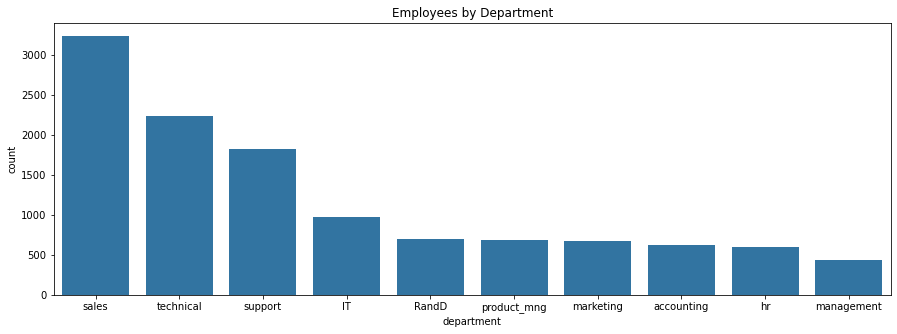

In [26]:
# Create a plot for department
plt.figure(figsize=(15,5))
sns.countplot(df1['department'], color = '#1f77b4',order=df1['department'].value_counts().index)
plt.title('Employees by Department');


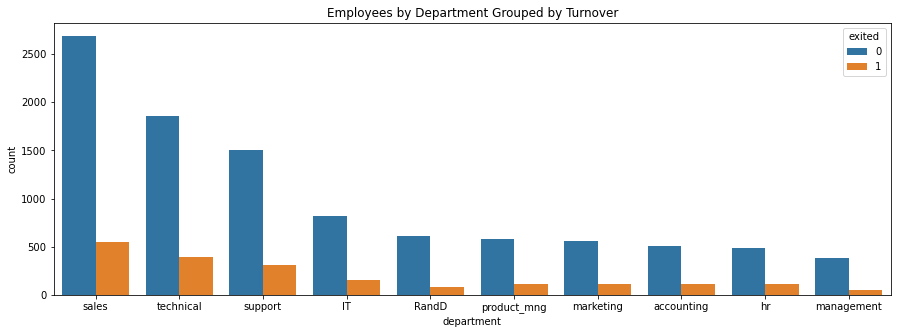

In [27]:
# Create a plot for department
plt.figure(figsize=(15,5))
sns.countplot(x=df1['department'], hue=df1['exited'],order=df1['department'].value_counts().index)
plt.title('Employees by Department Grouped by Turnover');

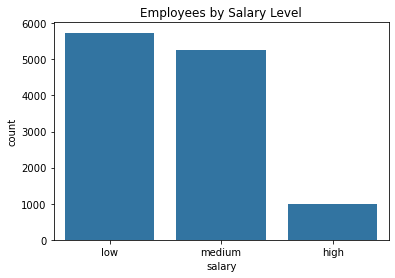

In [28]:
# Create a plot as needed
sns.countplot(df1['salary'], color = '#1f77b4')
plt.title('Employees by Salary Level');

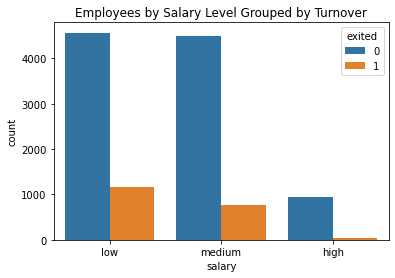

In [29]:
# Create a plot as needed
sns.countplot(x='salary', data=df1, hue='exited')
plt.title('Employees by Salary Level Grouped by Turnover');

In [30]:
# Create numeric `salary_code` column

# Create a replacement dictionary
salary_code_dict = {'low':0, 'medium':1, 'high':2}

# Populate the `salary_code` column
df1['salary_code'] = df1['salary'].replace(salary_code_dict)

df1.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code
0,0.38,0.53,2,157,3.0,0,1,0,sales,low,0
1,0.80,0.86,5,262,5.5,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5.0,0,1,0,sales,low,0
4,0.37,0.52,2,159,3.0,0,1,0,sales,low,0


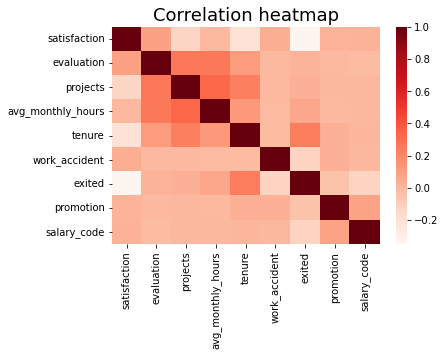

In [31]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(method='pearson'), cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

In [32]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df1.corr(method='pearson')

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,salary_code
satisfaction,1.000000,0.095186,-0.133246,-0.006252,-0.193786,0.039940,-0.350558,0.019789,0.029241
evaluation,0.095186,1.000000,0.270256,0.264678,0.118604,-0.005695,0.013520,-0.007206,-0.015775
projects,-0.133246,0.270256,1.000000,0.331516,0.234585,-0.005612,0.030928,-0.000544,-0.000502
avg_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.128970,-0.012860,0.070409,-0.004964,-0.000551
tenure,-0.193786,0.118604,0.234585,0.128970,1.000000,-0.013509,0.244936,0.033300,0.009970
work_accident,0.039940,-0.005695,-0.005612,-0.012860,-0.013509,1.000000,-0.125436,0.029852,-0.000058
exited,-0.350558,0.013520,0.030928,0.070409,0.244936,-0.125436,1.000000,-0.044657,-0.118882
promotion,0.019789,-0.007206,-0.000544,-0.004964,0.033300,0.029852,-0.044657,1.000000,0.087851
salary_code,0.029241,-0.015775,-0.000502,-0.000551,0.009970,-0.000058,-0.118882,0.087851,1.000000


* The correlation of most concern is between `avg_monthly_hours` and `projects`.
* There is a higher correlation between `avg_monthly_hours` and `exited` compared to `projects`, so we should consider dropping `projects` for a logistic regression.
* Collinearity between `avg_monthly_hours` and `evaluation` is also a concern. Of these two, I would consider dropping `evaluation` for a logistic regression, because it has the lower correlation with `exited`.

In [33]:
# Convert `department` to numeric data

# Create dummy variables with department values
dummies = pd.get_dummies(df1['department'])

# Combine `df1` DataFrame with new dummy department columns
df1 = pd.concat([df1, dummies], axis = 1)

# Display the first few rows of `df1`
df1.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,5.5,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# compute the vif for all given features
def compute_vif(df, considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [35]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','management','marketing','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
9,RandD,inf
10,accounting,inf
16,support,inf
15,sales,inf
14,product_mng,inf
13,marketing,inf
12,management,inf
11,hr,inf
17,technical,inf
8,IT,inf


Because all of the department variables have 'infinite' VIF values, I will try removing them one at a time.

Removing `RandD`:

In [36]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','accounting','hr','management','marketing','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,4.139537
16,technical,3.446099
15,support,3.078144
8,IT,2.214810
13,product_mng,1.878039
12,marketing,1.860708
9,accounting,1.798326
10,hr,1.774851
11,management,1.587855
2,projects,1.238014


Removing `accounting`:

In [37]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','hr','management','marketing','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,4.540760
16,technical,3.753620
15,support,3.338592
8,IT,2.364643
9,RandD,1.996820
13,product_mng,1.986273
12,marketing,1.969789
10,hr,1.870709
11,management,1.660535
2,projects,1.238014


Removing `support`:

In [38]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','management','marketing','product_mng','sales',
                       'technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
15,sales,2.031121
16,technical,1.815418
8,IT,1.411791
9,RandD,1.303109
14,product_mng,1.298508
13,marketing,1.296809
10,accounting,1.272871
11,hr,1.265082
2,projects,1.238014
12,management,1.219357


Removing `sales`:

In [39]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','management','marketing','product_mng',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
16,technical,1.378049
15,support,1.326931
2,projects,1.238014
8,IT,1.196691
3,avg_monthly_hours,1.170160
1,evaluation,1.148302
9,RandD,1.144870
14,product_mng,1.143687
13,marketing,1.142135
10,accounting,1.130999


Removing `product_mng`:

In [40]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','management','marketing','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,4.180523
16,technical,3.473555
15,support,3.100851
8,IT,2.225875
9,RandD,1.898596
13,marketing,1.875828
10,accounting,1.808407
11,hr,1.784150
12,management,1.604618
2,projects,1.238014


Removing `marketing`:

In [41]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','management','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,4.250606
16,technical,3.535902
15,support,3.152987
8,IT,2.258333
9,RandD,1.915209
13,product_mng,1.909867
10,accounting,1.825942
11,hr,1.800612
12,management,1.602582
2,projects,1.238014


Removing `management`:

In [42]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','marketing','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,6.275908
16,technical,5.110179
15,support,4.482346
8,IT,3.032720
9,RandD,2.471024
13,product_mng,2.470074
12,marketing,2.422972
10,accounting,2.327253
11,hr,2.292706
2,projects,1.238014


Removing `hr`:

In [43]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','management','marketing','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,4.667603
16,technical,3.853258
15,support,3.422561
8,IT,2.413149
9,RandD,2.032761
13,product_mng,2.021287
12,marketing,2.003580
10,accounting,1.929568
11,management,1.687355
2,projects,1.238014


Removing `technical`:

In [44]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','IT','RandD','accounting','hr','management','marketing','product_mng','sales',
                       'support'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
15,sales,1.786032
16,support,1.537141
8,IT,1.318882
2,projects,1.238014
9,RandD,1.235255
14,product_mng,1.231615
13,marketing,1.231377
10,accounting,1.211738
11,hr,1.205959
12,management,1.177060


Removing `IT`:

In [45]:
# features to consider removing
considered_features = ['satisfaction','evaluation','projects','avg_monthly_hours','tenure','work_accident','promotion',
                       'salary_code','RandD','accounting','hr','management','marketing','product_mng','sales',
                       'support','technical'
                      ]

# compute vif 
compute_vif(df1,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
14,sales,3.155484
16,technical,2.683276
15,support,2.432018
8,RandD,1.615195
13,product_mng,1.605688
12,marketing,1.600068
9,accounting,1.553042
10,hr,1.536555
11,management,1.421198
2,projects,1.238014


### Insights

* Very few employees at Salifort Motors have been promoted in the last 5 years.
* Few employees have salaries in the high range. Most have low or medium salaries.
* Sales is the department with the largest number of employees, followed by technical and support departments.
* Most employees have been at the company between 2 and 5 years.
* Removing `sales` leads to the lowest VIF values. I will drop this predictor from the model to deal with multicollinearity.
* Even though they were somewhat correlated with other variables, `projects` and `evaluation` both have low VIF values, so they will not need to be dropped from the model.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



* I didn't notice anything odd
* I chose all variables except for `sales`. Originally, all of the department dummy encoded variables had an 'infinite' value for VIF. I cycled through each department variable, removing one variable and retaining all the others and recalculating VIFs. I discovered that removing `sales` had the greatest impact on the VIF values for other variables.
* Assumptions:
    * The outcome variable is categorical
    * Each observation is an individual employee, so each observation is independent from the others
    * The `sales` variable has been dropped because of multicollinearity issues.
    * The extreme outliers seen in `tenure` have been removed
    * Linear relationship between each X variable and the logit of the outcome variable (tested using Box-Tidwell)
        * This assumption has been violated for `satisfaction`
    * The assumption of sufficient sample size has been met
        * I used the formula N = 10 k / p , where k is the number of predictors and p is the proportion of positive cases in the population.
        * N = 10 * 18 / 0.166 = 1085 minimum sample size
        * Our sample size is 11991, and we are using 80% of that (9592 observations) as training data to build the model. We have well over the minimum sample size for a logistic regression with this number of predictors.
* Model Performance Metrics
    * Accuracy: 0.840350
    * Precision: 0.475904
    * Recall: 0.210667
    * F1 Score: 0.292052
    * AUC: 0.541273
* Looking at both the coefficients and p values, I think that removing `technical` could improve the model, as it has a low coefficient and is not statistically significant.
* I find myself referring to example code used in previous courses, as well as the following online resources:
    * To check the  a linear relationship between each continuous X variable and the logit of the probability that Y equals 1, I used the Box-Tidwell test: https://github.com/sandipanpaul21/Logistic-regression-in-python/blob/main/07_LR_Assumptions.ipynb
    * Instructions on using a polynomial to transform the `satisfied` column due to its violation of the log linear relationship: https://blog.quantinsti.com/polynomial-regression-adding-non-linearity-to-a-linear-model/
    * Instructions on using multinomial logistic regression: 
        * https://library.virginia.edu/data/articles/logistic-regression-four-ways-with-python
    * Instructions on determining sufficient sample size: 
        * https://stats.stackexchange.com/questions/26016/sample-size-for-logistic-regression
    * Instructions on calculating Variance Inflation Factor (VIF):
        * https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
    * Information about data separation: 
        * https://www.statisticssolutions.com/data-separation/
* I have no ethical considerations at this time, however, the Salifort HR department and leadership teams should uphold the same ethical standards for this model that they would use for any HR function.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification task.

### Identify the types of models most appropriate for this task.

Logistic regression and tree-based models are the most appropriate for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [46]:
# Box Tidwell test to check for a linear relationship between each X variable and the logit of the outcome variable

# Box Tidwell only works for positive values. Hence, drop values where x = 0.
# We will do this in a new dataframe (lt for logit transform)
df1_lt = df1.drop(df1[df1.satisfaction == 0].index)
df1_lt = df1_lt.drop(df1_lt[df1_lt.avg_monthly_hours == 0].index)
df1_lt = df1.drop(df1_lt[df1_lt.tenure == 0].index)

# Logistic Regression with statsmodel 
# Inclusion of interaction term (logit transform) as part of Box-Tidwell test

# Define continuous variables
continuous_var = ['satisfaction', 'avg_monthly_hours', 'tenure']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in continuous_var:
    df1_lt[f'{var}:Log_{var}'] = df1_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df1_lt.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,satisfaction:Log_satisfaction,avg_monthly_hours:Log_avg_monthly_hours,tenure:Log_tenure
0,0.38,0.53,2,157,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.367682,793.830591,3.295837
1,0.80,0.86,5,262,5.5,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,-0.178515,1458.906260,9.376115
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,-0.242800,1524.778162,5.545177
3,0.72,0.87,5,223,5.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.236523,1205.799305,8.047190
4,0.37,0.52,2,159,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,-0.367873,805.955768,3.295837


In [47]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + df1_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['satisfaction',
 'avg_monthly_hours',
 'tenure',
 'satisfaction:Log_satisfaction',
 'avg_monthly_hours:Log_avg_monthly_hours',
 'tenure:Log_tenure']

In [48]:
# Redefine independent variables to include interaction terms
X_lt = df1_lt[cols_to_keep]
y_lt = df1_lt['exited']

# Add constant
X_lt = sma.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 exited   No. Observations:                11991
Model:                            GLM   Df Residuals:                    11984
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4233.9
Date:                Sat, 09 Dec 2023   Deviance:                       8467.7
Time:                        22:12:18   Pearson chi2:                 9.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Results of Box-Tidwell Test
* The p value for satisfaction:Log_satisfaction is not < 0.05, meaning that it is not statistically significant. For the `satisfaction` variable, the assumption has been violated.
* The p values for avg_monthly_hours:Log_avg_monthly_hours and tenure:Log_tenure are < 0.05, meaning they are statistically significant. The assumption has not been violated for these variables.
* The `satisfaction` variable should be transformed or dropped.

In [49]:
# Create the `satisfaction_squared` column
df1['satisfaction_squared']=df1['satisfaction']**2
df1.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,satisfaction_squared
0,0.38,0.53,2,157,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1444
1,0.80,0.86,5,262,5.5,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0.6400
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0.0121
3,0.72,0.87,5,223,5.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.5184
4,0.37,0.52,2,159,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1369


In [50]:
# Repeat the Box Tidwell test with our transformed variable

# Box Tidwell only works for positive values. Hence, drop values where x = 0.
# We will do this in a new dataframe (lt for logit transform)
df1_lt = df1.drop(df1[df1.satisfaction_squared == 0].index)
df1_lt = df1_lt.drop(df1_lt[df1_lt.avg_monthly_hours == 0].index)
df1_lt = df1.drop(df1_lt[df1_lt.tenure == 0].index)

# Logistic Regression with statsmodel 
# Inclusion of interaction term (logit transform) as part of Box-Tidwell test

# Define continuous variables
continuous_var = ['satisfaction_squared', 'avg_monthly_hours', 'tenure']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in continuous_var:
    df1_lt[f'{var}:Log_{var}'] = df1_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df1_lt.head()

,satisfaction,evaluation,projects,avg_monthly_hours,tenure,work_accident,exited,promotion,department,salary,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,satisfaction_squared,satisfaction_squared:Log_satisfaction_squared,avg_monthly_hours:Log_avg_monthly_hours,tenure:Log_tenure
0,0.38,0.53,2,157,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1444,-0.279438,793.830591,3.295837
1,0.80,0.86,5,262,5.5,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0.6400,-0.285624,1458.906260,9.376115
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0,0.0121,-0.053416,1524.778162,5.545177
3,0.72,0.87,5,223,5.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.5184,-0.340593,1205.799305,8.047190
4,0.37,0.52,2,159,3.0,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0,0.1369,-0.272226,805.955768,3.295837


In [51]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + df1_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['satisfaction_squared',
 'avg_monthly_hours',
 'tenure',
 'satisfaction_squared:Log_satisfaction_squared',
 'avg_monthly_hours:Log_avg_monthly_hours',
 'tenure:Log_tenure']

In [52]:
# Redefine independent variables to include interaction terms
X_lt = df1_lt[cols_to_keep]
y_lt = df1_lt['exited']

# Add constant
X_lt = sma.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 exited   No. Observations:                11991
Model:                            GLM   Df Residuals:                    11984
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4232.8
Date:                Sat, 09 Dec 2023   Deviance:                       8465.6
Time:                        22:12:19   Pearson chi2:                 9.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Results of Box-Tidwell Test:
* After transforming the `satisfaction` variable by squaring it, the assumption of logit linearity is met.

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          11991 non-null  float64
 1   evaluation            11991 non-null  float64
 2   projects              11991 non-null  int64  
 3   avg_monthly_hours     11991 non-null  int64  
 4   tenure                11991 non-null  float64
 5   work_accident         11991 non-null  int64  
 6   exited                11991 non-null  int64  
 7   promotion             11991 non-null  int64  
 8   department            11991 non-null  object 
 9   salary                11991 non-null  object 
 10  salary_code           11991 non-null  int64  
 11  IT                    11991 non-null  uint8  
 12  RandD                 11991 non-null  uint8  
 13  accounting            11991 non-null  uint8  
 14  hr                    11991 non-null  uint8  
 15  management         

In [54]:
# Creating a new dataframe for construction of the Logistic Regression model

df2 = df1.copy()

df2 = df2.drop(['satisfaction','department','salary','sales'], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluation            11991 non-null  float64
 1   projects              11991 non-null  int64  
 2   avg_monthly_hours     11991 non-null  int64  
 3   tenure                11991 non-null  float64
 4   work_accident         11991 non-null  int64  
 5   exited                11991 non-null  int64  
 6   promotion             11991 non-null  int64  
 7   salary_code           11991 non-null  int64  
 8   IT                    11991 non-null  uint8  
 9   RandD                 11991 non-null  uint8  
 10  accounting            11991 non-null  uint8  
 11  hr                    11991 non-null  uint8  
 12  management            11991 non-null  uint8  
 13  marketing             11991 non-null  uint8  
 14  product_mng           11991 non-null  uint8  
 15  support            

In [55]:
# Remove the target column from the features
X = df2.drop(columns='exited')

# Set y variable
y = df2[['exited']]

# Display first few rows
X.head()

,evaluation,projects,avg_monthly_hours,tenure,work_accident,promotion,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,satisfaction_squared
0,0.53,2,157,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0.1444
1,0.86,5,262,5.5,0,0,1,0,0,0,0,0,0,0,0,0,0.6400
2,0.88,7,272,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0.0121
3,0.87,5,223,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0.5184
4,0.52,2,159,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0.1369


In [56]:
y.head()

,exited
0,1
1,1
2,1
3,1
4,1


In [57]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Multiple Logistic Regression Method #1

# Create a logistic regression classifier model

# Create the formula string
all_columns = ' + '.join(X.columns)
formula = 'exited ~ ' + all_columns
print('Formula: ', formula, '\n')

Formula:  exited ~ evaluation + projects + avg_monthly_hours + tenure + work_accident + promotion + salary_code + IT + RandD + accounting + hr + management + marketing + product_mng + support + technical + satisfaction_squared 



In [59]:
# Put the training predictors and the responses into one DataFrame to be imput into the model
trainingdata = pd.concat([X_train,y_train], axis = 1)

# Build the model
log_reg_1 = sm.logit(formula = formula, data = trainingdata).fit()

log_reg_1.summary()

Optimization terminated successfully.
         Current function value: 0.357924
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 exited   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9574
Method:                           MLE   Df Model:                           17
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.2107
Time:                        22:12:20   Log-Likelihood:                -3433.2
converged:                       True   LL-Null:                       -4349.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.3108      0.176    -13.163      0.000      -2.655      -1.967
evaluation               0.4800      0.200      2.399      0.016       0.088       0.872
projects                -0.2502      0.028     -8.884      0.000      -0.305      -0.195
avg_monthly_hours        0.0045      0.001      6.492      0.000       0.003       0.006
tenure                   0.6326      0.031     20.614      0.000       0.572       0.693
work_accident           -1.4349      0.123    -11.630      0.000      -1.677      -1.193
promotion               -1.3106      0.411     -3.185      0.001      -2.117      -0.504
salary_code             -0.6206      0.053    -11.755      0.000      -0.724      -0.517
IT                      -0.1115      0.123     -0.907      0.365      -0.353       0.130
RandD                   -0.5126      0.156     -3.278      0.001      -0.819      -0.206
accounting              -0.2149      0.147     -1.462      0.144      -0.503       0.073
hr                       0.1041      0.141      0.737      0.461      -0.173       0.381
management              -0.3345      0.186     -1.799      0.072      -0.699       0.030
marketing               -0.1209      0.144     -0.840      0.401      -0.403       0.161
product_mng             -0.0899      0.140     -0.641      0.521      -0.365       0.185
support                  0.0323      0.097      0.332      0.740      -0.158       0.223
technical               -0.0065      0.091     -0.072      0.943      -0.184       0.171
satisfaction_squared    -3.3464      0.130    -25.657      0.000      -3.602      -3.091
========================================================================================
"""

Looking at both the coefficients and p values, I think that removing `technical` could improve the model, as it has a low coefficient and is not statistically significant.

In [60]:
# Predict responses 
pred_1 = log_reg_1.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
y_pred_1 = list(map(round, pred_1))

# Model performance metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_1))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_1))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_1))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_1))

Accuracy: 0.825344
Precision: 0.342857
Recall: 0.128000
F1 Score: 0.186408


While this has a relatively high accuracy, the precision, recall, and F1 scores are low.

In [61]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[1932   92]
 [ 327   48]]


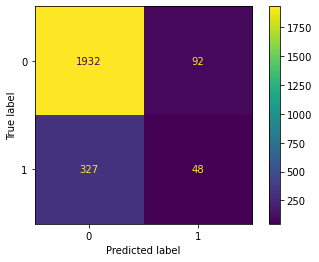

In [62]:
    # Produce a nicer looking confusion matrix.
    labels = [0,1]
    cm = metrics.confusion_matrix(y_test, y_pred_1, labels = labels)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
    disp.plot(values_format = '')

In [63]:
# Logistic Regression Method 2
log_reg_2 = LogisticRegression(penalty='none', solver = 'newton-cg', max_iter= 150).fit(X_train,y_train)

In [64]:
# sklearn does not provide a built-in function to show the summary of a regression model. 
# It does however provide functions to extract the model coefficients and intercept:
print("Model Coefficients: ", log_reg_2.coef_)

Model Coefficients:  [[ 0.48002293 -0.25022131  0.00445513  0.63258753 -1.43493696 -1.31059487
  -0.62060296 -0.11151008 -0.51258751 -0.21486094  0.10414587 -0.33448102
  -0.12090066 -0.08989537  0.03226963 -0.00648359 -3.34643494]]


In [65]:
print("\nModel Intercept: ",log_reg_2.intercept_)


Model Intercept:  [-2.31080066]


In [66]:
# Predict responses 
pred_2 = log_reg_2.predict(X_test)
y_pred_2 = list(map(round, pred_2))

# Model 2 Performance Metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_2))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_2))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_2))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_2))

Accuracy: 0.825344
Precision: 0.342857
Recall: 0.128000
F1 Score: 0.186408


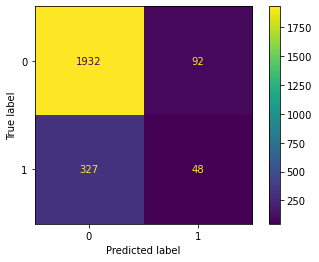

In [67]:
# Produce a confusion matrix.
cm = metrics.confusion_matrix(y_test, y_pred_2, labels = log_reg_2.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = log_reg_2.classes_)
disp.plot(values_format = '')

In [68]:
# Multiple Logistic Regression Method #3

# add constant to training data
x_train_const = tools.add_constant(X_train)
# Train the logistic regression with the training data
log_reg_3 = sma.Logit(y_train, x_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.357924
         Iterations 7


In [69]:
print(log_reg_3.summary())

                           Logit Regression Results                           
Dep. Variable:                 exited   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9574
Method:                           MLE   Df Model:                           17
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.2107
Time:                        22:12:32   Log-Likelihood:                -3433.2
converged:                       True   LL-Null:                       -4349.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.3108      0.176    -13.163      0.000      -2.655      -1.967
evaluation               0.4800      0.200      2.399      0.016       0.088       0.872
projects    

In [70]:
# add constant to test data
x_test_const = tools.add_constant(X_test)
# Predict responses 
pred_3 = log_reg_3.predict(x_test_const)
y_pred_3 = list(map(round, pred_3))

# Model Method 3 Performance Metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_3))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_3))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_3))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_3))

Accuracy: 0.825344
Precision: 0.342857
Recall: 0.128000
F1 Score: 0.186408


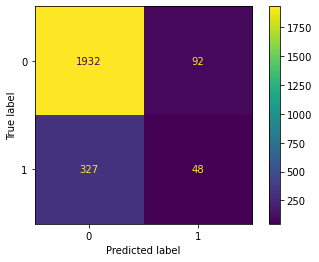

In [71]:
# Produce a confusion matrix.
labels = [0,1]
cm = metrics.confusion_matrix(y_test, y_pred_3, labels = labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
disp.plot(values_format = '')

In [72]:
# Multiple Logistic Regression Method # 4

log_reg_4 = sma.GLM(y_train, X_train, family=sma.families.Binomial()).fit()

In [73]:
log_reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 exited   No. Observations:                 9592
Model:                            GLM   Df Residuals:                     9575
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3522.7
Date:                Sat, 09 Dec 2023   Deviance:                       7045.4
Time:                        22:12:33   Pearson chi2:                 8.98e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
evaluation              -0.5195      0.183     -2.845      0.004      -0.877      -0.162
projects                -0.2547      0.027     -9.316      0.000      -0.308      -0.201
avg_monthly_hours        0.0013      0.001      2.050      0.040     5.7e-05       0.003
tenure                   0.4756      0.028     16.919      0.000       0.421       0.531
work_accident           -1.4965      0.122    -12.249      0.000      -1.736      -1.257
promotion               -1.3145      0.409     -3.217      0.001      -2.115      -0.514
salary_code             -0.7010      0.052    -13.524      0.000      -0.803      -0.599
IT                      -0.3486      0.120     -2.905      0.004      -0.584      -0.113
RandD                   -0.7062      0.153     -4.606      0.000      -1.007      -0.406
accounting              -0.4129      0.144     -2.863      0.004      -0.696      -0.130
hr                      -0.1708      0.139     -1.229      0.219      -0.443       0.102
management              -0.5305      0.185     -2.867      0.004      -0.893      -0.168
marketing               -0.3431      0.141     -2.434      0.015      -0.619      -0.067
product_mng             -0.3340      0.137     -2.437      0.015      -0.603      -0.065
support                 -0.2090      0.094     -2.226      0.026      -0.393      -0.025
technical               -0.2425      0.087     -2.794      0.005      -0.413      -0.072
satisfaction_squared    -3.6729      0.130    -28.329      0.000      -3.927      -3.419
========================================================================================
"""

In [74]:
# Predict responses 
pred_4 = log_reg_4.predict(X_test)
y_pred_4 = list(map(round, pred_4))

# Model Method 4 Performance Metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_4))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_4))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_4))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_4))

Accuracy: 0.840350
Precision: 0.475904
Recall: 0.210667
F1 Score: 0.292052


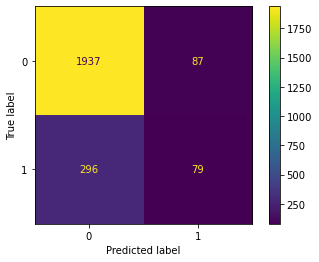

In [75]:
# Produce a confusion matrix.
labels = [0,1]
cm = metrics.confusion_matrix(y_test, y_pred_4, labels = labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
disp.plot(values_format = '')

In [80]:
metrics.roc_auc_score(y_test,y_pred_3)

0.5412727272727273

In [81]:
# Creating a new dataframe for construction of the Logistic Regression model

df3 = df2.copy()

df3 = df3.drop(['technical'], axis=1)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluation            11991 non-null  float64
 1   projects              11991 non-null  int64  
 2   avg_monthly_hours     11991 non-null  int64  
 3   tenure                11991 non-null  float64
 4   work_accident         11991 non-null  int64  
 5   exited                11991 non-null  int64  
 6   promotion             11991 non-null  int64  
 7   salary_code           11991 non-null  int64  
 8   IT                    11991 non-null  uint8  
 9   RandD                 11991 non-null  uint8  
 10  accounting            11991 non-null  uint8  
 11  hr                    11991 non-null  uint8  
 12  management            11991 non-null  uint8  
 13  marketing             11991 non-null  uint8  
 14  product_mng           11991 non-null  uint8  
 15  support            

In [82]:
# Remove the target column from the features
X = df3.drop(columns='exited')

# Set y variable
y = df3[['exited']]

# Display first few rows
X.head()

,evaluation,projects,avg_monthly_hours,tenure,work_accident,promotion,salary_code,IT,RandD,accounting,hr,management,marketing,product_mng,support,satisfaction_squared
0,0.53,2,157,3.0,0,0,0,0,0,0,0,0,0,0,0,0.1444
1,0.86,5,262,5.5,0,0,1,0,0,0,0,0,0,0,0,0.6400
2,0.88,7,272,4.0,0,0,1,0,0,0,0,0,0,0,0,0.0121
3,0.87,5,223,5.0,0,0,0,0,0,0,0,0,0,0,0,0.5184
4,0.52,2,159,3.0,0,0,0,0,0,0,0,0,0,0,0,0.1369


In [83]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
# Multiple Logistic Regression Method #1

# Create a logistic regression classifier model

# Create the formula string
all_columns = ' + '.join(X.columns)
formula = 'exited ~ ' + all_columns
print('Formula: ', formula, '\n')

Formula:  exited ~ evaluation + projects + avg_monthly_hours + tenure + work_accident + promotion + salary_code + IT + RandD + accounting + hr + management + marketing + product_mng + support + satisfaction_squared 



In [85]:
# Put the training predictors and the responses into one DataFrame to be imput into the model
trainingdata = pd.concat([X_train,y_train], axis = 1)

# Build the model
log_reg_5 = sm.logit(formula = formula, data = trainingdata).fit()

log_reg_5.summary()

Optimization terminated successfully.
         Current function value: 0.357925
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 exited   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9575
Method:                           MLE   Df Model:                           16
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.2107
Time:                        22:52:09   Log-Likelihood:                -3433.2
converged:                       True   LL-Null:                       -4349.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.3133      0.172    -13.453      0.000      -2.650      -1.976
evaluation               0.4799      0.200      2.398      0.016       0.088       0.872
projects                -0.2503      0.028     -8.890      0.000      -0.305      -0.195
avg_monthly_hours        0.0045      0.001      6.492      0.000       0.003       0.006
tenure                   0.6326      0.031     20.623      0.000       0.573       0.693
work_accident           -1.4350      0.123    -11.630      0.000      -1.677      -1.193
promotion               -1.3107      0.411     -3.185      0.001      -2.117      -0.504
salary_code             -0.6206      0.053    -11.755      0.000      -0.724      -0.517
IT                      -0.1088      0.117     -0.929      0.353      -0.339       0.121
RandD                   -0.5099      0.152     -3.358      0.001      -0.808      -0.212
accounting              -0.2122      0.142     -1.493      0.135      -0.491       0.066
hr                       0.1068      0.136      0.783      0.433      -0.160       0.374
management              -0.3318      0.182     -1.821      0.069      -0.689       0.025
marketing               -0.1182      0.139     -0.851      0.395      -0.391       0.154
product_mng             -0.0872      0.135     -0.645      0.519      -0.352       0.178
support                  0.0349      0.090      0.389      0.697      -0.141       0.211
satisfaction_squared    -3.3464      0.130    -25.657      0.000      -3.602      -3.091
========================================================================================
"""

In [86]:
# Predict responses 
pred_5 = log_reg_5.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
y_pred_5 = list(map(round, pred_5))

In [87]:
# Model performance metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_5))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_5))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_5))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_5))

Accuracy: 0.824927
Precision: 0.338129
Recall: 0.125333
F1 Score: 0.182879


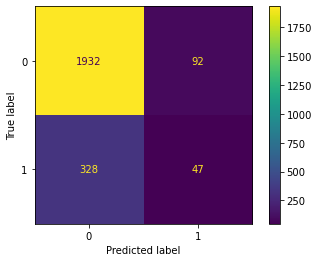

In [88]:
# Produce a  confusion matrix.
labels = [0,1]
cm = metrics.confusion_matrix(y_test, y_pred_5, labels = labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = labels)
disp.plot(values_format = '')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.